# Lab - Feature Selection 

This lab asks you to play with feature selection and how to interpret which features contribute to your model.

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Classification 
In this task you work with WDBC data.  As a reminder, your task is to
predict __diagnosis__ (''M'' = cancer, ''B'' = no cancer).  


1. Load wdbc data and ensure it looks good.


2. Create your feature matrix $X$ and label vector $y$.  The former should contain all 30 features,  everything, except __diagnosis__ and __id__.  The latter should be __diagnosis__, converted to either logical or numeric variable (otherwise sklearn will fail).


3.  Split your data into training and validation chunks (or do cross validation).


4. Fit a decision tree (on training data), and compute accuracy (on validation data).  Use a combination of all three hyperparameters when defining the model.  As a refresher, you can create it along these lines:
```
m = DecisionTreeClassifier(max_depth=7, min_samples_leaf=..., ...)
```  
and you can compute accuracy on validation data as
```
m.score(Xv, yv)
```
where Xv and yv are your validation/test features $X$ and test labels $y$. 


5. Plot the resulting tree created by your tree model. What features does your tree think are the most important? Do these make sense? 


6. Now explain how you could use decision trees for dimensionality reduction. 

In [226]:
#code goes here
#1
df = pd.read_csv("wdbc.csv.bz2")
df.head(5)

,id,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [227]:
print(df.shape)
print()
print(df.isna().sum())

(569, 32)

id                   0
diagnosis            0
radius.mean          0
texture.mean         0
perimeter.mean       0
area.mean            0
smoothness.mean      0
compactness.mean     0
concavity.mean       0
concpoints.mean      0
symmetry.mean        0
fracdim.mean         0
radius.se            0
texture.se           0
perimeter.se         0
area.se              0
smoothness.se        0
compactness.se       0
concavity.se         0
concpoints.se        0
symmetry.se          0
fracdim.se           0
radius.worst         0
texture.worst        0
perimeter.worst      0
area.worst           0
smoothness.worst     0
compactness.worst    0
concavity.worst      0
concpoints.worst     0
symmetry.worst       0
fracdim.worst        0
dtype: int64


In [228]:
#2
X = df.loc[:, ~df.columns.isin(['diagnosis', 'id'])] 
y = df.diagnosis.to_frame()

y.diagnosis = np.where(y.diagnosis == 'M', 1, 0)

In [229]:
#3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [230]:
#4
m = DecisionTreeClassifier(max_depth=7, min_samples_split=10, min_samples_leaf=5)
m.fit(X_train, y_train)
accuracy = m.score(X_test, y_test)
print("Accuracy on validation data:", accuracy)

Accuracy on validation data: 0.9298245614035088


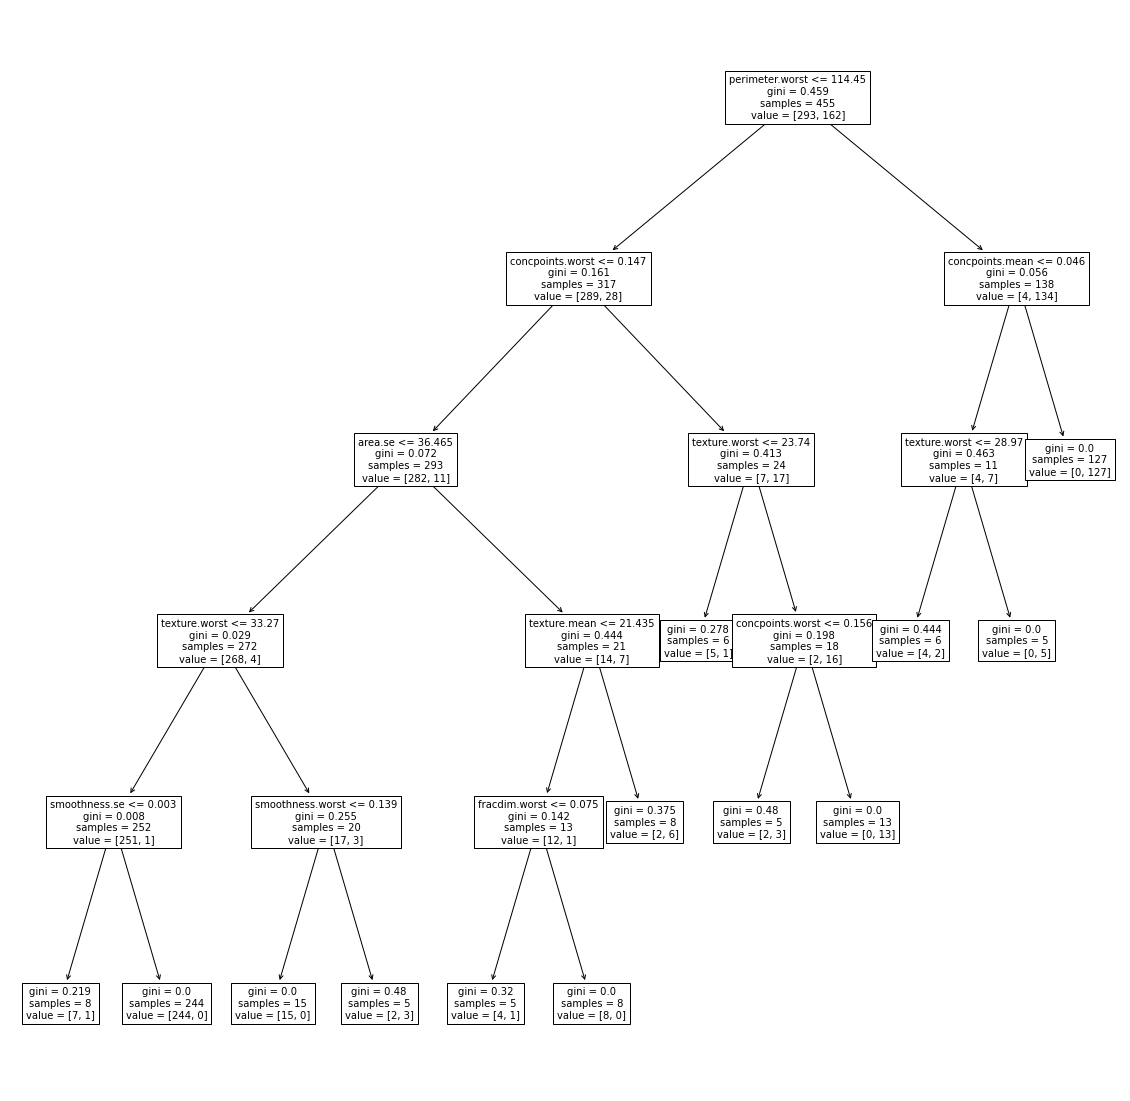

In [231]:
#5
plt.figure(figsize=(20, 20))
plot_tree(m, feature_names = X_train.columns, fontsize=10)
plt.show()

Features that have relatively high Gini importance scores, such as `perimeter.worst`, `texture.mean`, and `texture.worst`, can be considered as the most important features in the decision tree. Also, nodes closer to the root node, such as `perimeter.worst`, `concpoints.worst`, and `concpoints.mean`, are likely to be more important for the overall model since they have a greater impact on the final predictions. Therefore, `perimeter.worst`, `concpoints.worst`, and `texture.worst` are among the most important features for the prediction. These features are reasonable because they are likely to be relevant in identifying cancer.

In [232]:
#6

Decision trees can be used for dimensionality reduction by selecting the most significant features for predictions. This involves training a decision tree on the dataset containing all possible features and evaluating the importance of each feature. The features with the highest importance scores are then selected as the most important ones.

Now lets compare what we get when we use other feature selection approaches! 


7. Using forward search but this time with k-NN (you can use the one built in to scikitlearn -- documenation [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)), which features are considered the most important? How do these compare to what was returned by your tree model? 


8. Now repeat step 7 but with backward search. Do you get diffe

In [238]:
#code goes here
#7
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

m = KNeighborsClassifier(n_neighbors=5)
m.fit(X_train_std, y_train.values.ravel())

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(m,
          k_features = 5,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 5)

sfs1 = sfs1.fit(X_train_std, y_train.values.ravel())
df.columns[1:][list(sfs1.k_feature_idx_)]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished

[2023-03-01 02:43:48] Features: 1/5 -- score: 0.9142857142857143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s finished

[2023-03-01 02:43:49] Features: 2/5 -- score: 0.9516483516483516[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.6s finished

[2023-03-01 02:43:50] Features: 3/5 -- score: 0.9714285714285715[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Index(['fracdim.se', 'radius.worst', 'perimeter.worst', 'compactness.worst',
       'concavity.worst'],
      dtype='object')

`fracdim.se`, `radius.worst`, `perimeter.worst`, `compactness.worst`, and `concavity.worst` are selected as the most important features based on their scores. Compared to the tree model above, the forward search results include `perimeter.worst` which was also present in the tree model.

In [240]:
#8
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

m = KNeighborsClassifier(n_neighbors=5)
m.fit(X_train_std, y_train.values.ravel())

sfs1 = SFS(m,
          k_features = 5,
          forward = False,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 5)

sfs1 = sfs1.fit(X_train_std, y_train.values.ravel())
df.columns[1:][list(sfs1.k_feature_idx_)]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.0s finished

[2023-03-01 02:45:54] Features: 29/5 -- score: 0.9736263736263737[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.0s finished

[2023-03-01 02:45:55] Features: 28/5 -- score: 0.9736263736263737[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.9s finished

[2023-03-01 02:45:56] Features: 27/5 -- score: 0.9736263736263737[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Index(['radius.mean', 'symmetry.mean', 'fracdim.se', 'area.worst',
       'concavity.worst'],
      dtype='object')

The backward search required more time compared to the forward search since it begins from the end, and it resulted in different important features - `radius.mean`, `symmetry.mean`, `fracdim.se`, `area.worst`, and `concavity.worst`. However, in both forward and backward search, they include `concavity.worst` as the most important feature.